# Make table comparing with observations
author: [Mathieu Renzo](mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *


In [2]:
set_plotDefaults()

done in plotDefaults.py


In [13]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_30_M2_17_P100_Z0.01/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/weak_wind/"
# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/do_J_accretion/"
binary = folder+"/binary_to_postRLOF/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

re-run\_exponential


(0, 20.19267546981151)

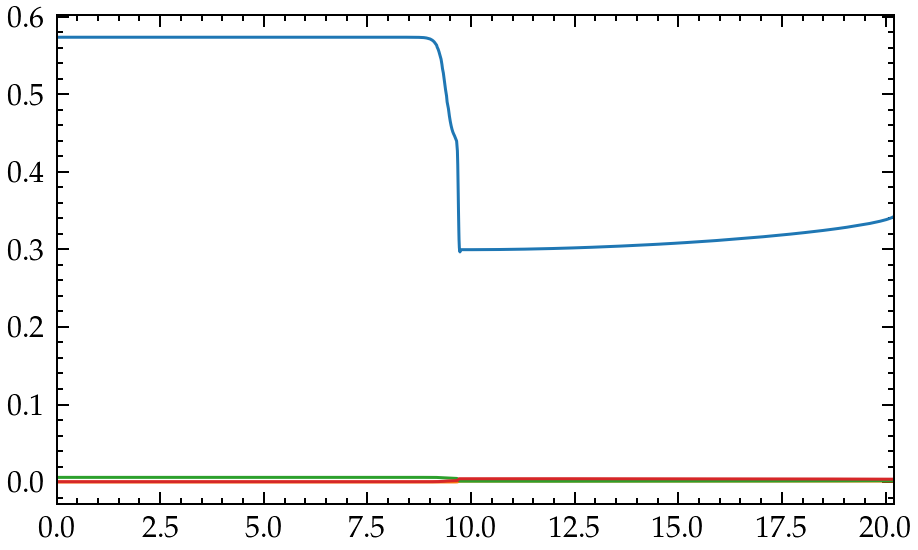

In [17]:
pfile = accretor+'/LOGS/profile11.data'
src, col = getSrcCol(pfile)
# print(col)
# dq = src[:, col.index('dq')]
mass = src[:, col.index("mass")]
he4 = src[:, col.index('he4')]
c12 = src[:, col.index('c12')]
n14 = src[:, col.index('n14')]
o16 = src[:, col.index('o16')]

fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])
ax.plot(mass, he4, label="he4")
ax.plot(mass, c12, label="c12")
ax.plot(mass, n14, label="n14")
ax.plot(mass, o16, label="o16")
ax.set_xlim(0, max(mass))


In [18]:
# based on the plot above, we can take the value in zone 1 as the surface value

def get_data_from_pfile(pfile):
    src, col = getSrcCol(pfile)

    h1 = src[0, col.index('h1')]
    he4 = src[0, col.index('he4')]
    c12 = src[0, col.index('c12')]
    n14 = src[0, col.index('n14')]
    o16 = src[0, col.index('o16')]
    radius = src[0, col.index("radius")]
    omega =  src[0, col.index("omega")]
    print(omega)
    mass = src[0, col.index("mass")]
    vrot = (radius*Rsun_cm/1e5)*omega
    omega = omega*24*60*60
    return(mass, radius, omega, vrot, h1, he4, c12,n14, o16)

In [22]:
def mk_table(pfile, output="../manuscript/table.tex"):
    mass, radius, omega, vrot, h1, he4, c12, n14, o16 = get_data_from_pfile(pfile)
    # define template
    template = r"""
    % this table was automatically generated using the table.ipynb in the repository associated to this manuscript
    % the profile model summarized is from the post-RLOF evolution as single star and is NUMBER.data
    \begin{table*}[hbpt]
    \centering
    \begin{tabular}{c|c|c|c|c|c|c|c|c}
    \hline\hline
    $M \ [M_\odot]$ & $R\ [R_\odot]$ & $ \omega \ [\mathrm{days^{-1}}]$ & $v_\mathrm{rot} \ [\kms] $ & $X(^{1}\mathrm{H})$ & $X(^{4}\mathrm{He})$ & $X(^{12}\mathrm{C})$ & $X(^{14}\mathrm{N})$ & $X(^{16}\mathrm{O})$ \\
    \hline
    MASS & RADIUS & OMEGA & VROT & HYDROGEN & HE & CARBON & NITROGEN & OXYGEN \\
    \hline
    \end{tabular}
    \caption{Properties of the accretors shortly after the end of RLOF
    (last thin blue cross in \Figref{fig:HRD_both} and last panel of \Figref{fig:D_mix}).}
    \label{tab:surf_prop}
    \end{table*}
    """
    template = template.replace("MASS", f"{mass:.1f}")
    template = template.replace("RADIUS", f"{radius:.1f}")
    template = template.replace("OMEGA", f"{omega:.3f}")
    template = template.replace("VROT", f"{vrot:.1f}")
    template = template.replace("HYDROGEN", f"{h1:.6f}")
    template = template.replace("HE", f"{he4:.6f}")
    template = template.replace("CARBON", f"{c12:.6f}")
    template = template.replace("NITROGEN", f"{n14:.6f}")
    template = template.replace("OXYGEN", f"{o16:.6f}")
    # set profile number
    num = pfile.split('/')[-1].split('.')[0]
    template = template.replace("NUMBER", num)
    # print(template, file=open(output, 'w'))
    print(template) #, file=open(output, 'w'))

    
#test
mk_table(pfile)
    

6.79923963006156e-05

    % this table was automatically generated using the table.ipynb in the repository associated to this manuscript
    % the profile model summarized is from the post-RLOF evolution as single star and is profileprofile11.data
    \begin{table*}[hbpt]
    \centering
    \begin{tabular}{c|c|c|c|c|c|c|c|c}
    \hline\hline
    $M \ [M_\odot]$ & $R\ [R_\odot]$ & $ \omega \ [\mathrm{days^{-1}}]$ & $v_\mathrm{rot} \ [\kms] $ & $X(^{1}\mathrm{H})$ & $X(^{4}\mathrm{He})$ & $X(^{12}\mathrm{C})$ & $X(^{14}\mathrm{N})$ & $X(^{16}\mathrm{O})$ \\
    \hline
    20.2 & 8.4 & 5.875 & 396.2 & 0.648008 & 0.342148 & 0.001307 & 0.001778 & 0.003694 \\
    \hline
    \end{tabular}
    \caption{Properties of the accretors shortly after the end of RLOF
    (last thin blue cross in \Figref{fig:HRD_both} and last panel of \Figref{fig:D_mix}).}
    \label{tab:surf_prop}
    \end{table*}
    


In [53]:


get_zeta_oph_surface_he(X=0.678010)

# show me some data
print("he4:", get_zeta_oph_surface_he(X=0.678010))
print("c12:", get_zeta_oph_surface_c(X=0.678010))
print("n14:", get_zeta_oph_surface_n(X=0.678010))
print("o16:", get_zeta_oph_surface_o(X=0.678010))
print("===========================")
print("he4:", get_zeta_oph_surface_he(X=0.7))
print("c12:", get_zeta_oph_surface_c(X=0.7))
print("n14:", get_zeta_oph_surface_n(X=0.7))
print("o16:", get_zeta_oph_surface_o(X=0.7))




he4: (0.3351959550561798, 0.1372628808583865, 0.0549051523433546)
c12: (0.0005894097903485333, 0.0004071498590763836)
n14: (0.0020766539621156497, 0.001434501736942355)
o16: (0.0053131989971199976, 0.003670227842063826)
he4: (0.34606741573033706, 0.1417147484563215, 0.056685899382528604)
c12: (0.0006085262064629921, 0.00042035501150937074)
n14: (0.0021440063914705608, 0.001481027146885221)
o16: (0.005485522776926591, 0.0037892648920291416)
